In [ ]:
# Exploratory Data Analysis (EDA) 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





In [3]:
data = pd.read_csv('survey_results_public.csv')



In [4]:
print("Dataset shape:", data.shape)
print(data.head())



Dataset shape: (89184, 84)
   ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   
3           4  I agree  I am a developer by profession  25-34 years old   
4           5  I agree  I am a developer by profession  25-34 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (so

In [5]:
print(data.info())
print(data.describe(include='all'))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [6]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_data.head(10))



                                     Missing Values  Percentage
AINextVery similar                            86563   97.061132
AINextSomewhat similar                        82946   93.005472
AINextNeither different nor similar           82585   92.600691
AINextVery different                          76523   85.803507
AIDevWantToWorkWith                           69597   78.037540
AIToolNot interested in Using                 68115   76.375807
AINextSomewhat different                      65881   73.870874
AIDevHaveWorkedWith                           63280   70.954431
AIToolInterested in Using                     56401   63.241164
AIToolCurrently Using                         53047   59.480400


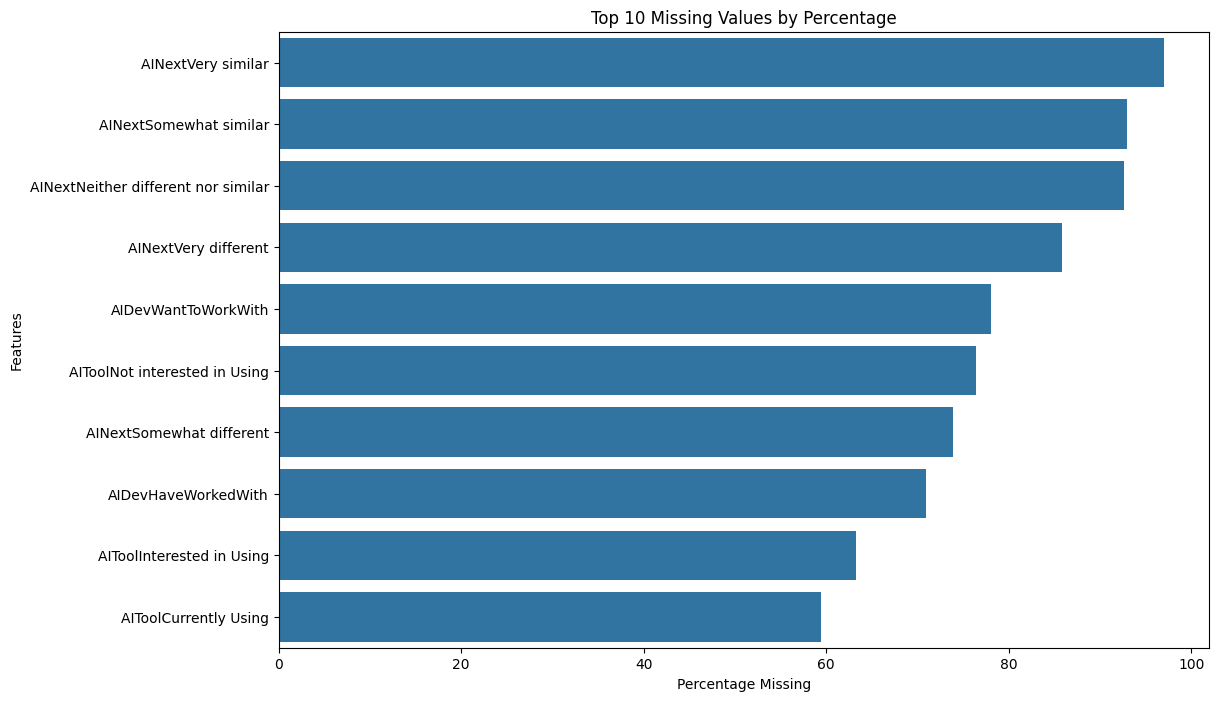

In [7]:
plt.figure(figsize=(12,8))
sns.barplot(x=missing_percent.head(10), y=missing_percent.head(10).index)
plt.title("Top 10 Missing Values by Percentage")
plt.xlabel("Percentage Missing")
plt.ylabel("Features")
plt.show()


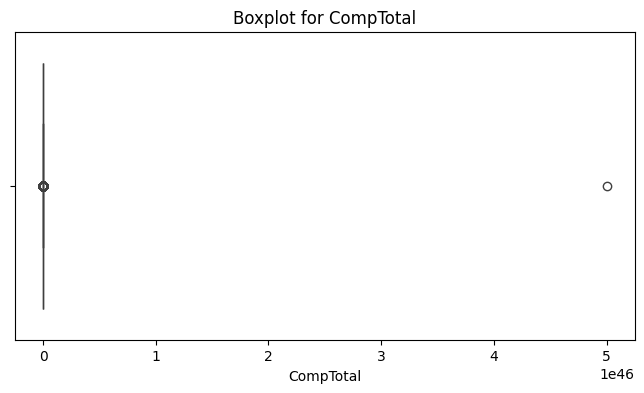

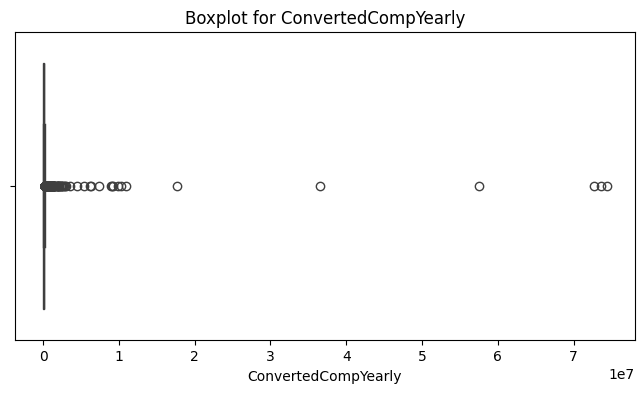

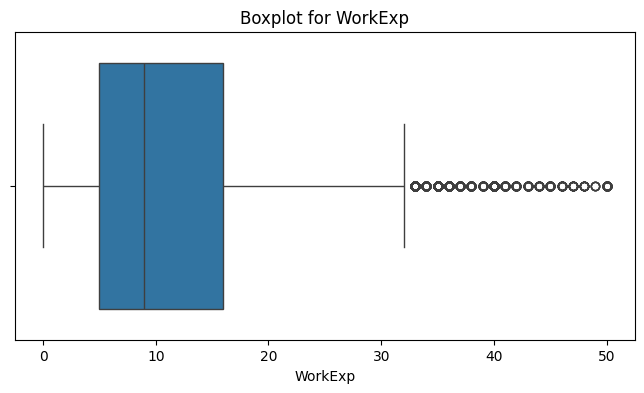

In [8]:

numeric_cols = ['CompTotal', 'ConvertedCompYearly', 'WorkExp']
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [9]:

for col in numeric_cols:
    percentile_95 = data[col].quantile(0.95)
    data[col] = np.where(data[col] > percentile_95, percentile_95, data[col])


In [10]:

data['YearsCode'] = pd.to_numeric(data['YearsCode'], errors='coerce')
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')




In [11]:
age_mapping = {
    'Under 18 years old': 1, '18-24 years old': 2, '25-34 years old': 3, 
    '35-44 years old': 4, '45-54 years old': 5, '55-64 years old': 6, '65 years or older': 7
}
data['AgeGroup'] = data['Age'].map(age_mapping)



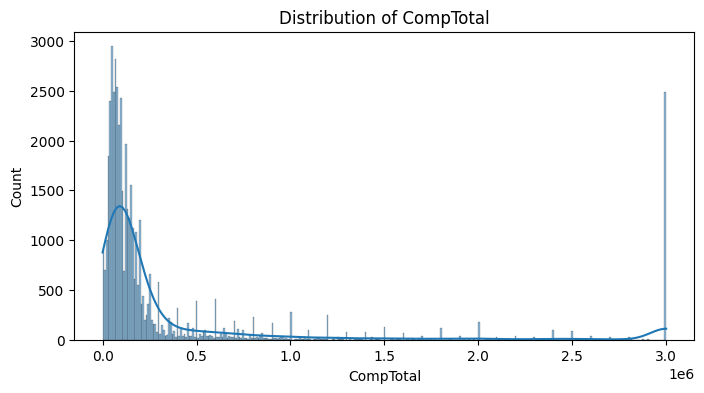

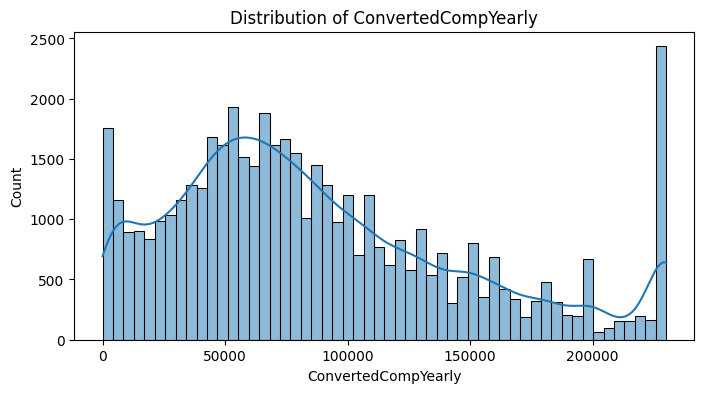

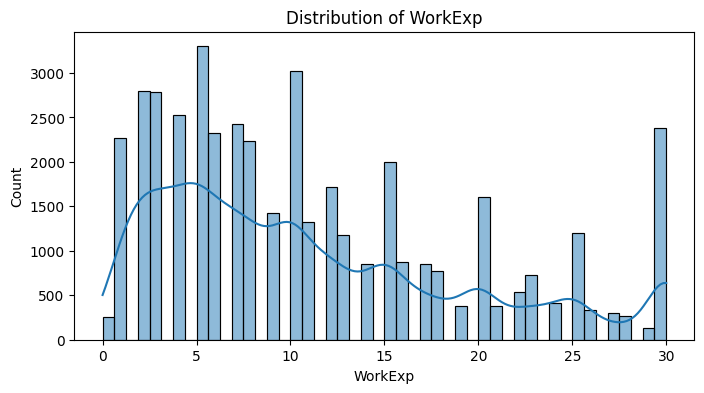

In [12]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()



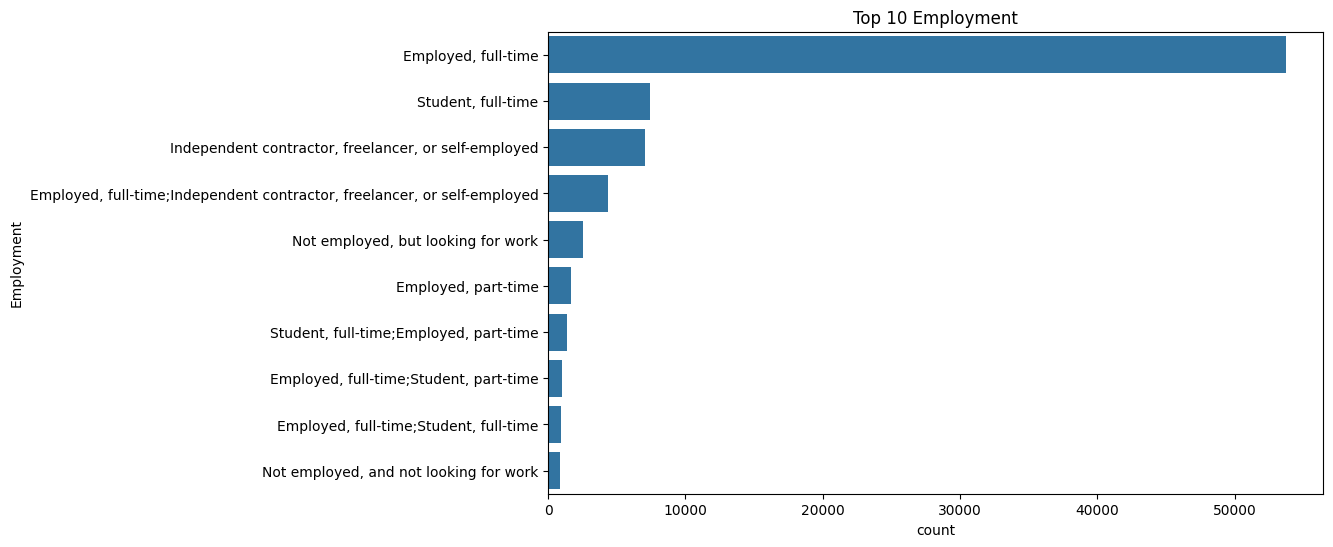

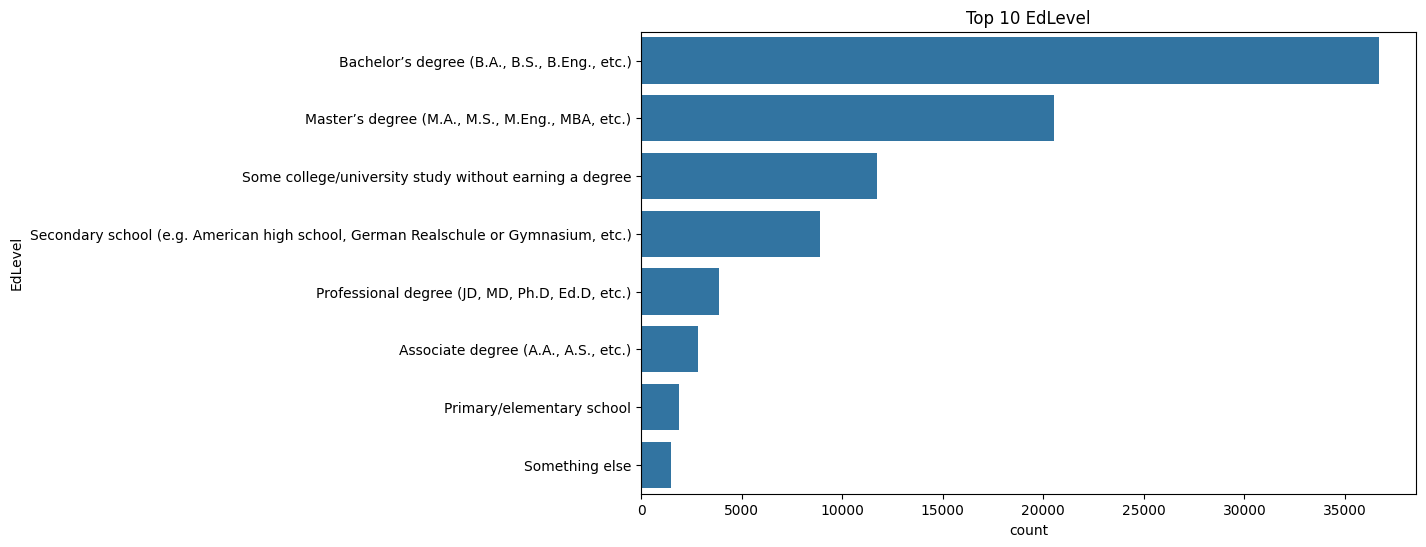

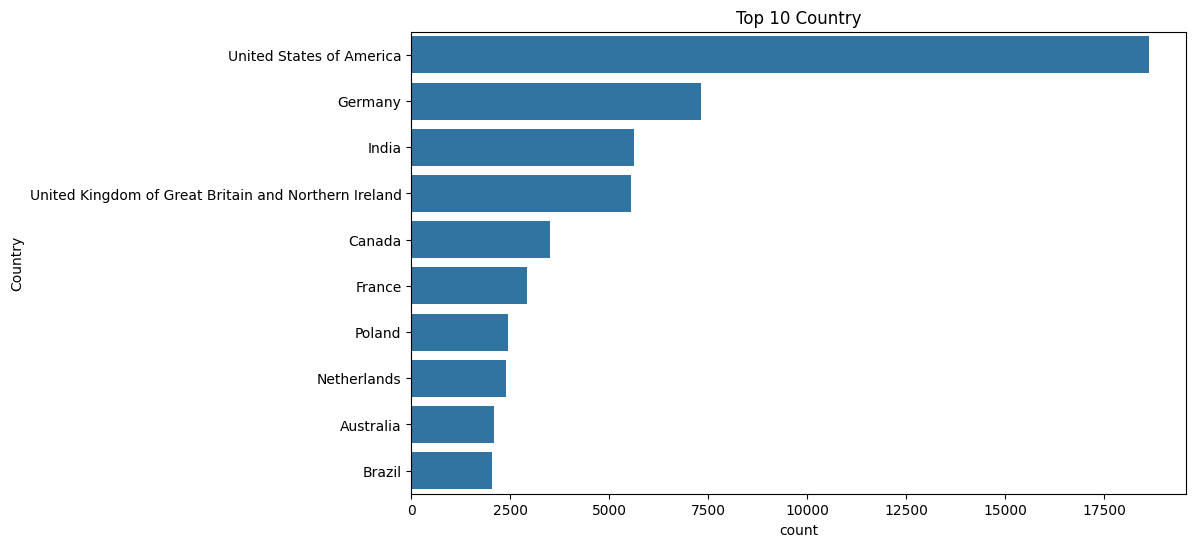

In [13]:
categorical_cols = ['Employment', 'EdLevel', 'Country']
for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(y=col, data=data, order=data[col].value_counts().iloc[:10].index)
    plt.title(f"Top 10 {col}")
    plt.show()



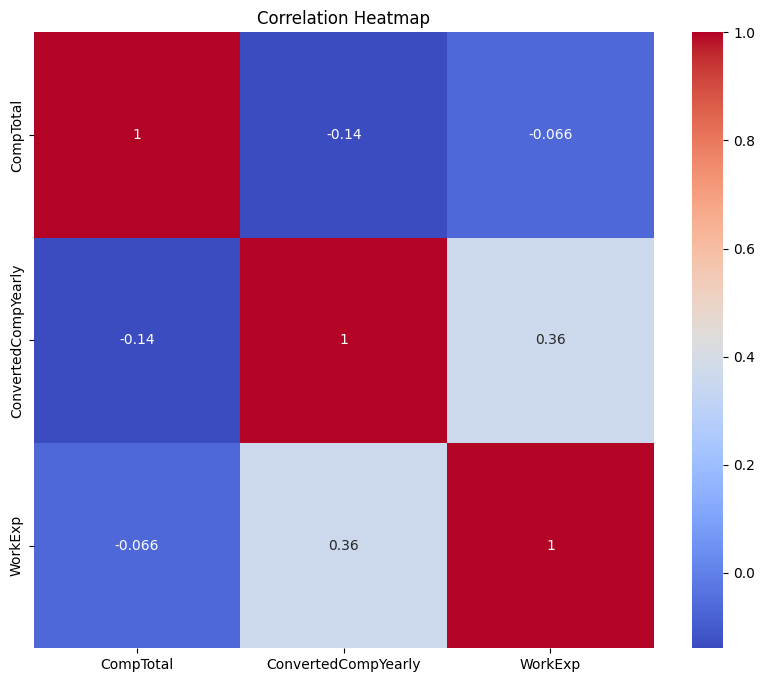

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()